Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, InputLayer, Input
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

2024-11-25 16:16:14.253442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 16:16:14.263101: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 16:16:14.286893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732569374.335293    6509 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732569374.349527    6509 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 16:16:14.399036: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Import data

In [2]:
df = pd.read_csv("../backend/dataset1.csv")
df.drop(columns=["rawData"], inplace = True)
df.head()

,pos,eyeDistance,shoulderDistance,eyeShoulderAngle,eyesNoseDistanceDiff,eyesShouldersY,noseEarsY
0,0,75.474941,356.550235,0.040094,0.175490,221.235151,19.782915
1,0,76.271106,355.333501,0.039938,0.126906,218.549280,25.467968
2,0,73.998752,352.383438,0.014419,0.146738,222.232819,19.077187
3,1,87.027394,345.468540,0.031495,0.192182,178.468819,28.269730
4,1,115.648331,374.838669,0.001412,0.123426,142.069397,72.939634


Split data into output and input

In [3]:
target_column = "pos"
output_column = df.drop(columns=[target_column])
output_rows = df[target_column]
df.drop(target_column, axis=1, inplace=True)
df.head()

,eyeDistance,shoulderDistance,eyeShoulderAngle,eyesNoseDistanceDiff,eyesShouldersY,noseEarsY
0,75.474941,356.550235,0.040094,0.175490,221.235151,19.782915
1,76.271106,355.333501,0.039938,0.126906,218.549280,25.467968
2,73.998752,352.383438,0.014419,0.146738,222.232819,19.077187
3,87.027394,345.468540,0.031495,0.192182,178.468819,28.269730
4,115.648331,374.838669,0.001412,0.123426,142.069397,72.939634


Scale data

In [4]:
# scaler = MinMaxScaler()
# scaler.fit(df)
# t_df = scaler.transform(df)

t_df = df

Split train and test data (investigate whether to stratify data later on)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=1, stratify=output_rows)
print(X_test)

    eyeDistance  shoulderDistance  eyeShoulderAngle  eyesNoseDistanceDiff  \
14   122.869911        387.959315          0.063219              0.088474   
60    89.145553        317.394189          0.602197             -0.214410   
21    85.031607        382.175554          0.010390             -0.471912   
26    55.749507        304.672191          0.079061              0.091067   
9    100.255228        361.941353          0.293317             -0.175802   
7    110.571616        369.218343          0.278903              0.209367   
58    77.008920        342.268945          0.336263              0.039359   
28    52.681209        301.191971          0.259264             -0.231775   
46    92.195704        323.629836          0.005521              0.153581   
50    94.068159        323.027084          0.030356              0.201778   
36    74.945176        361.464485          0.027764              0.145302   
32    72.374697        340.290214          0.169745              0.064938   

Model

In [6]:
basic_model = Sequential()
basic_model.add(InputLayer(shape=(6,)))
basic_model.add(Dense(units=16, activation='relu'))
basic_model.add(BatchNormalization())
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

2024-11-25 16:16:29.898787: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Training

In [12]:
basic_model.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9539 - loss: 0.1679
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9777 - loss: 0.1882
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9658 - loss: 0.1877 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9762 - loss: 0.1585
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9777 - loss: 0.1818
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9554 - loss: 0.1734
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9658 - loss: 0.2085
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9658 - loss: 0.1877
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9777 - loss: 0.1821
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9315 - loss: 0.1975
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9435 - loss: 0.1767
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9643 - lo

Results

In [13]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8947 - loss: 0.3357
[0.3356647491455078, 0.8947368264198303]
Loss =  0.3356647491455078
Accuracy =  0.8947368264198303


Graphs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


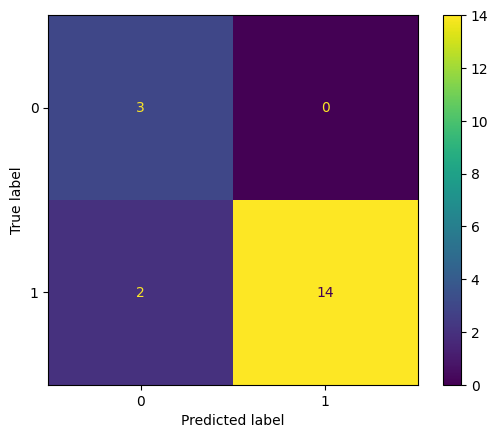

In [14]:
predicted = basic_model.predict(X_test)

predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

Save model

In [15]:
from datetime import datetime
now = datetime.now()

print(now)

formatted_string = now.strftime("%Y-%m-%d(%H:%M:%S)")

basic_model.save("./models/" + formatted_string + ".h5")

2024-11-25 16:36:20.739216
